# Factors that influence the Performance of 10,000 Udemy Business Courses
---

author: Joseph Salmawobil   email: jsalmawobil@gmail.com  date created: "2023-08-14"

---

This is a Case Study carried on a dataset on Udemy Courses. I am going to
Analyse Data Collected on Courses uploaded on UDEMY. It will use the six
steps in Data Analysis. `ASK`, `PREPARE`, `PROCESS`, `ANALYZE`, `SHARE`,
and `ACT`

### 1. Ask Phase

The client is a fictional company called **SubAdd Tech Solutions**,
which seeks to analyse existing trends and various variables affecting
the performance of courses on UDEMY to help them strategize for the
courses they are about to create. They have no Specific Questions, they
want a thorough investigation of the complete dataset as much as is
possible with a Junior Data Analyst.

Secondary Data will be used since **SubAdd tech Solutions** do not have
any form of pre-existing data already.

#### 1.1 Stakeholders

-   **Joseph Salmawobil**: Content creation manager at **SubAdd Tech
    Solutions**, he is interested in knowing what areas will be relevant
    to create courses around that will be more profitable and How long
    courses should be.
-   **Joe Yapzor**: The Marketing Director, who wants to know how to
    strategically use discounting and various Pricing strategies to sell
    the course. He is also interested in knowing how reviews can affect
    the success of a course.
-   **Josiah Wunmoya**: Chief Data Analyst, who was supposed to do this
    analysis but is currently busily working on a data set on marketing
    of the newest product launched by **SubAdd Tech Solution**, to help
    scale it up. He will however review the work at the end of it to
    give feedback.

#### 1.2 Deliverables

-   A Markdown version of the analysis process for the Chief Data
    Analyst to review.
-   A PowerPoint Presentation to help the Content Creation and Marketing
    Director to have get insights from the Analysis
   

### 2. Prepare Phase

Since the company does not have already existing data for the analysis,
a search was carried out online and a dataset was obtained from Kaggle.
Kaggle is a community of Data Scientist, which contains a lot of
Datasets to work with, some of which are free.


#### 2.1 Data Source

Secondary data was collected from a publicly available dataset on kaggle
named [Business Courses
Udemy](https://www.kaggle.com/datasets/jilkothari/business-courses-udemy-10k-courses).
It Contains information on 10,000 Courses on Udemy. All courses in the
data set are paid. This Data Set was Downloaded freely as a `csv file`
with the name `udemy_output_All_Business_p1_p626` The Dataset contains
20 columns consisting of different Variables which describe the data.
The number of roles are 9447, excluding the first column which serves as
the header. It includes various metrics such as discounts, course
published dates, course prices, number of reviews, rating, and number of
subscribers among others.


### 3. Process Phase



#### 3.0 Tool for Analysis

`R Programming Language` will be used for this analysis, this is because
of R’s ability to

-   Process Large Datasets faster.
-   Allow for reproducibility of analysis by rerunning the code.
-   Allow for manipulation of Data in various ways.
-   Ability to create world class Data Visualizations among many other
    advantages.

`Python` can also be used for this analysis, but `R` is the official
language of the company. `R Studio` desktop version is used for this
analysis.


#### 3.1 Setting Up the Environment for Analysis


In [102]:

#Installing Packages 
# Remove the # and Run these lines if you have not used these packages before

#install.packages("tidyverse")
#install.packages("lubridate")
#install.packages("readr")


# Loading of Packages
library(tidyverse)
library(lubridate)
library(readr)
library(dplyr)

# tidyverse contain most of the tools that will be used in this analysis

#### 3.2 Loading Dataset into the Envronment


In [103]:
# The Dataset is in the same folder as this MarkDown Book

courses <- read_csv("/kaggle/input/business-courses-udemy-10k-courses/udemy_output_All_Business_p1_p626.csv")


Rows: 9447 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): title, url, discount_price__currency, discount_price__price_strin...
dbl  (10): id, num_subscribers, avg_rating, avg_rating_recent, rating, num_r...
lgl   (2): is_paid, is_wishlisted
dttm  (2): created, published_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Previewing the Data


In [104]:
head(courses,2)

id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
<dbl>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
762616,The Complete SQL Bootcamp 2020: Go from Zero to Hero,/course/the-complete-sql-bootcamp/,TRUE,295509,4.66019,4.67874,4.67874,78006,FALSE,84,0,2016-02-14 22:57:48,2016-04-06 05:16:11,455,INR,₹455,8640,INR,"₹8,640"
937678,Tableau 2020 A-Z: Hands-On Tableau Training for Data Science,/course/tableau10/,TRUE,209070,4.58956,4.60015,4.60015,54581,FALSE,78,0,2016-08-22 12:10:18,2016-08-23 16:59:49,455,INR,₹455,8640,INR,"₹8,640"


In [105]:
glimpse(courses)


Rows: 9,447
Columns: 20
$ id                           <dbl> 762616, 937678, 1361790, 648826, 637930, …
$ title                        <chr> "The Complete SQL Bootcamp 2020: Go from …
$ url                          <chr> "/course/the-complete-sql-bootcamp/", "/c…
$ is_paid                      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE,…
$ num_subscribers              <dbl> 295509, 209070, 155282, 245860, 374836, 1…
$ avg_rating                   <dbl> 4.66019, 4.58956, 4.59491, 4.54407, 4.470…
$ avg_rating_recent            <dbl> 4.67874, 4.60015, 4.59326, 4.53772, 4.471…
$ rating                       <dbl> 4.67874, 4.60015, 4.59326, 4.53772, 4.471…
$ num_reviews                  <dbl> 78006, 54581, 52653, 46447, 41630, 38093,…
$ is_wishlisted                <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ num_published_lectures       <dbl> 84, 78, 292, 338, 83, 275, 23, 275, 144, …
$ num_published_practice_tests <dbl> 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ created       


#### 3.3 Data Cleaning

This process is used to ensure data integrity and to avoid errors and
biasis in the analysis

##### 3.3.1 Checking for `NA`

In [106]:
#This checks for Null Values in the dataset
nulls = is.na(courses)

#This summarises the characteristics of the null values
summary(nulls)

     id            title            url           is_paid       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:9447      FALSE:9447      FALSE:9447      FALSE:9447     
                                                                
 num_subscribers avg_rating      avg_rating_recent   rating       
 Mode :logical   Mode :logical   Mode :logical     Mode :logical  
 FALSE:9447      FALSE:9447      FALSE:9447        FALSE:9447     
                                                                  
 num_reviews     is_wishlisted   num_published_lectures
 Mode :logical   Mode :logical   Mode :logical         
 FALSE:9447      FALSE:9447      FALSE:9447            
                                                       
 num_published_practice_tests  created        published_time 
 Mode :logical                Mode :logical   Mode :logical  
 FALSE:9447                   FALSE:9447      FALSE:9447     
                                                             


-   From the Results, NULL values exist only in the section that has to
    do with Discounts, which is ok because not all the courses have
    discount.
-   The Null values in the data does not comprisise it’s integrity, it
    rather confirms it


##### 3.3.2 Checking for duplicates

This is to check is there are repeated rows in the dataset


In [107]:
#This checks for duplicated rows in the dataset
nulls = duplicated(courses)

#This summarises the characteristics of the duplicated rows
summary(nulls)

   Mode   FALSE 
logical    9447 


-   No Duplicate case is found in the dataset.

##### 3.3.3 Checking Columns to see if they are rightly categorised


In [108]:
glimpse(courses)


Rows: 9,447
Columns: 20
$ id                           <dbl> 762616, 937678, 1361790, 648826, 637930, …
$ title                        <chr> "The Complete SQL Bootcamp 2020: Go from …
$ url                          <chr> "/course/the-complete-sql-bootcamp/", "/c…
$ is_paid                      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE,…
$ num_subscribers              <dbl> 295509, 209070, 155282, 245860, 374836, 1…
$ avg_rating                   <dbl> 4.66019, 4.58956, 4.59491, 4.54407, 4.470…
$ avg_rating_recent            <dbl> 4.67874, 4.60015, 4.59326, 4.53772, 4.471…
$ rating                       <dbl> 4.67874, 4.60015, 4.59326, 4.53772, 4.471…
$ num_reviews                  <dbl> 78006, 54581, 52653, 46447, 41630, 38093,…
$ is_wishlisted                <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ num_published_lectures       <dbl> 84, 78, 292, 338, 83, 275, 23, 275, 144, …
$ num_published_practice_tests <dbl> 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ created       

In [109]:
glimpse(courses)

Rows: 9,447
Columns: 20
$ id                           <dbl> 762616, 937678, 1361790, 648826, 637930, …
$ title                        <chr> "The Complete SQL Bootcamp 2020: Go from …
$ url                          <chr> "/course/the-complete-sql-bootcamp/", "/c…
$ is_paid                      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE,…
$ num_subscribers              <dbl> 295509, 209070, 155282, 245860, 374836, 1…
$ avg_rating                   <dbl> 4.66019, 4.58956, 4.59491, 4.54407, 4.470…
$ avg_rating_recent            <dbl> 4.67874, 4.60015, 4.59326, 4.53772, 4.471…
$ rating                       <dbl> 4.67874, 4.60015, 4.59326, 4.53772, 4.471…
$ num_reviews                  <dbl> 78006, 54581, 52653, 46447, 41630, 38093,…
$ is_wishlisted                <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ num_published_lectures       <dbl> 84, 78, 292, 338, 83, 275, 23, 275, 144, …
$ num_published_practice_tests <dbl> 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ created       

-   All columns are in the right data class, including the
    `published time` and `date created`, which are in `DateTime` format

-   There is data integrity, hence I will proceed to the `ANALYSIS`
    phase.

### 4. Analyse Phase

Below are the analysis carried out on the dataset to get insights.

#### 4.1 Descriptive Statistics

Descriptive Statistics gives an overview of various columns in the
dataset.


In [110]:
# The Summary Function gives an overview statistics of all the non-chracter coluumns
summary(courses)

       id             title               url            is_paid       
 Min.   :   2762   Length:9447        Length:9447        Mode:logical  
 1st Qu.: 673031   Class :character   Class :character   TRUE:9447     
 Median :1381806   Mode  :character   Mode  :character                 
 Mean   :1456603                                                       
 3rd Qu.:2154793                                                       
 Max.   :3469452                                                       
                                                                       
 num_subscribers    avg_rating    avg_rating_recent     rating     
 Min.   :     3   Min.   :1.000   Min.   :1.000     Min.   :1.000  
 1st Qu.:   141   1st Qu.:3.900   1st Qu.:3.879     1st Qu.:3.879  
 Median :   916   Median :4.200   Median :4.206     Median :4.206  
 Mean   :  3399   Mean   :4.139   Mean   :4.125     Mean   :4.125  
 3rd Qu.:  2890   3rd Qu.:4.450   3rd Qu.:4.447     3rd Qu.:4.447  
 Max.   :374836 


**The Descriptive statistics indicates that**

-   All the courses in the data set were `paid` for and non was in the
    `wish list`
-   Number of Subscribers per course ranged from 3 to 374836 with an
    average number of subscribers as 3399, this is a huge variance,
    which will be investigate into.
-   Number of published lectures ranged from 0 to 699 with an average of
    34 lectures per course.
-   510 courses had discounts applied to them
-   The prices also ranged from 1280 Indian Ruppies (INR) to 12800 INR,
    but the average course was 4829 INR.
-   The courses were created between 14th April, 2010 and 2nd September,
    2020.

**Overall, the course has a lot of variance, that is some courses were
extremely more expensive than others and some performed extremely higher
than most of the courses. Outlier courses were many**

#### 4.2 Data Distribution

This will give an overview of how the data is distributed, how far or
near they are from the center.

##### 4.2.1 Distribution of Number of Subscribers


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


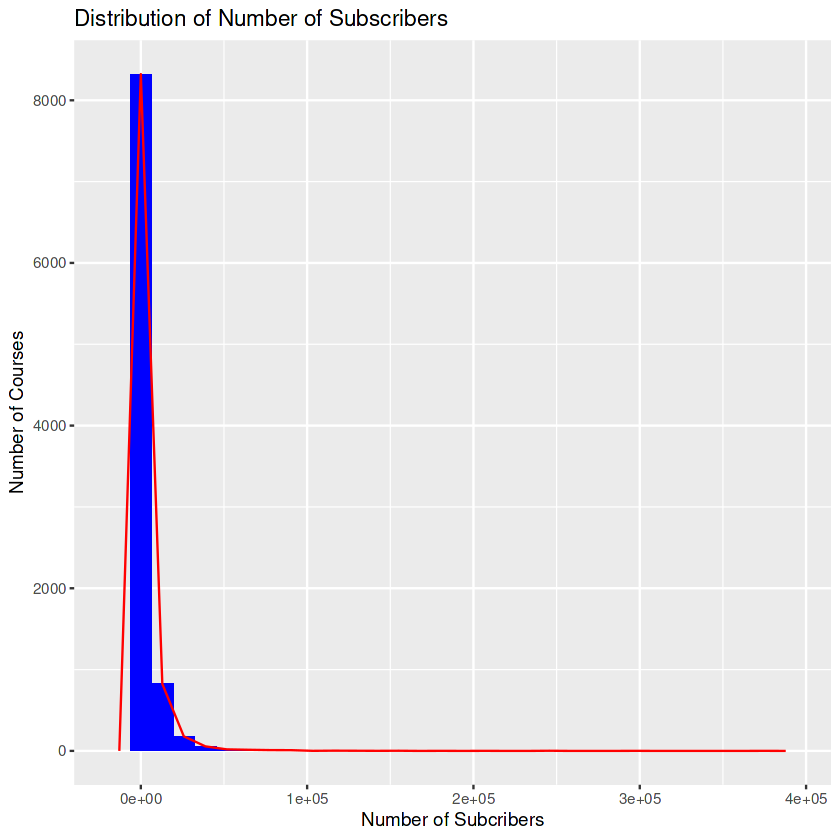

In [111]:
#ggplot will be used for visualization

ggplot(data= courses, mapping = aes(x= num_subscribers)) + geom_histogram(fill="blue") +
    geom_freqpoly(color="red") +
    labs(title= "Distribution of Number of Subscribers", x="Number of Subcribers", y= "Number of Courses")


-   Number of Subscribers is skewed to the left with a long tail on the
    right side indicating that some courses had extremely more number of
    subscribers than others.

##### 4.2.2 Distribution of Number of Average rating

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


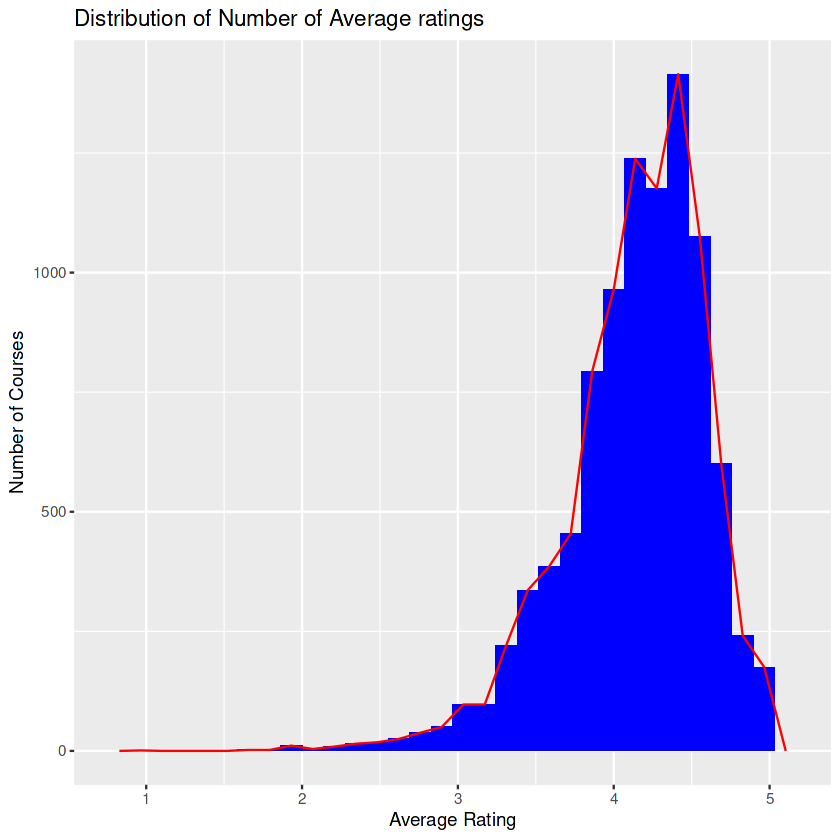

In [112]:
#ggplot will be used for visualization

ggplot(data= courses, mapping = aes(x= avg_rating)) + geom_histogram( fill= "blue") +
    geom_freqpoly(color="red") +
    labs(title= "Distribution of Number of Average ratings", x="Average Rating", y= "Number of Courses")

-   Average rating of the courses were mostly above 3.3 towards 5.0,
    indicating that they most of them performed above average, however
    there were a few courses that performed very poorly and fell between
    0.5 and 3.0

##### 4.2.3 Distribution of Number of Reviews

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


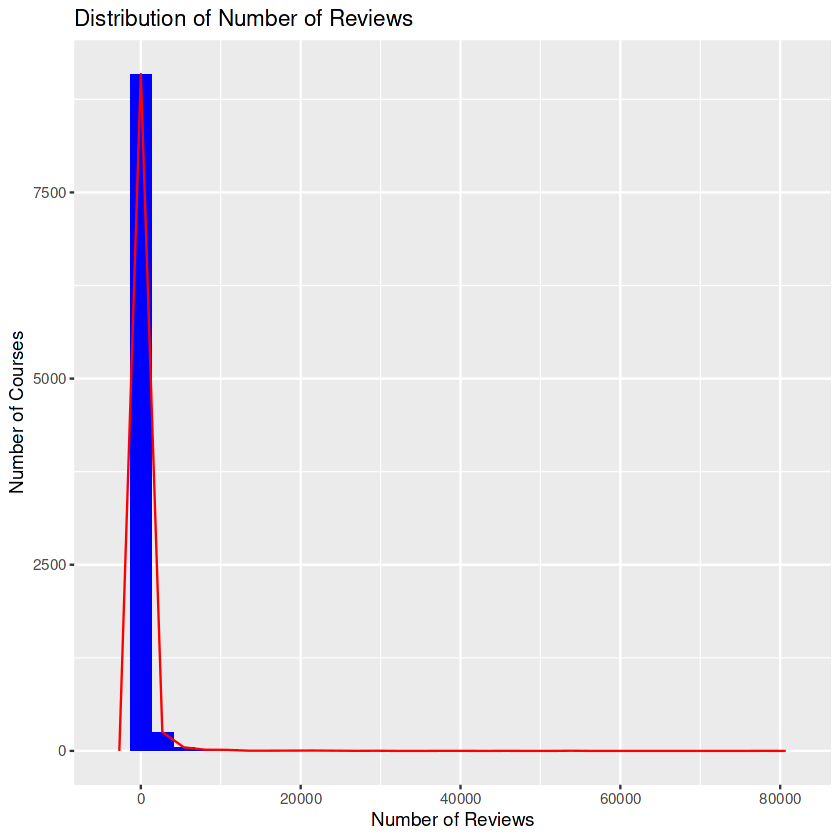

In [113]:
#ggplot will be used for visualisation

ggplot(data= courses, mapping = aes(x= num_reviews)) + geom_histogram(fill="blue") +
    geom_freqpoly(color="red") +
    labs(title= "Distribution of Number of Reviews", x="Number of Reviews", y= "Number of Courses")

-   The Distribution of number of reviews looks similar to that of the
    number of subscribers, which is normal because as a course gets more
    subscribers, it is expected to get more reviews for it.

##### 4.2.4 Distribution of Discounted courses

To get the number of discounted courses, we will use the `mutate`
function to create a column called `is_duplicated`, this contain a
`boolean` indicating where or not a course has a discount

In [114]:
# All discounted courses have   `NA` at the column `discount_price__amount`
courses <- courses %>% 
  mutate(is_discounted = ifelse(is.na(discount_price__amount)==FALSE, TRUE, FALSE ))

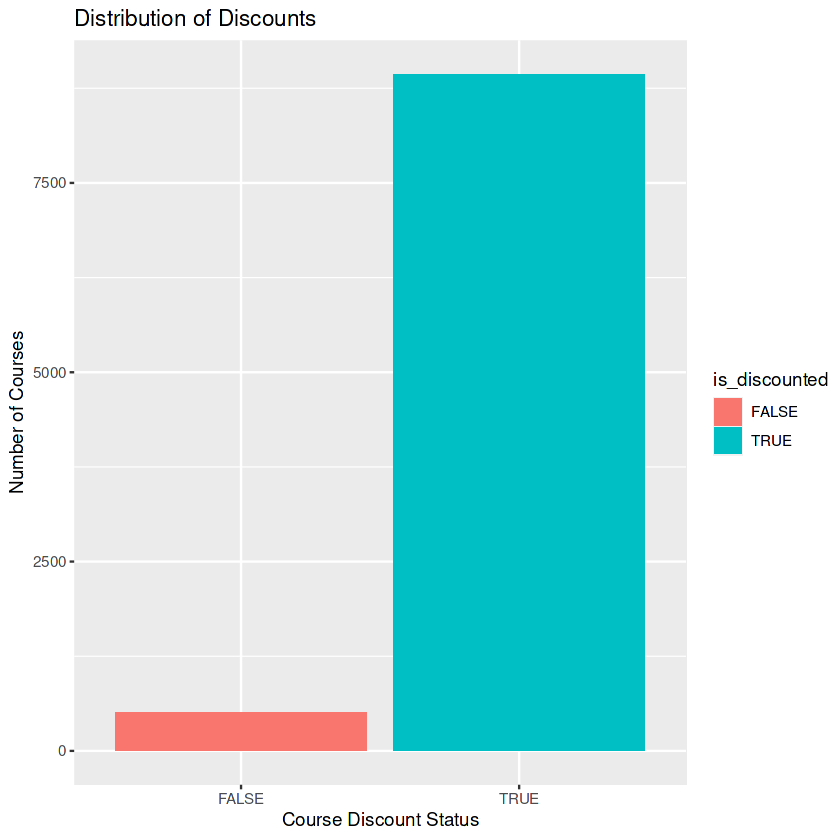

In [115]:
# Creating a Bar Chart to show distribution of discounts
ggplot(data=courses, mapping = aes(x= is_discounted, fill= is_discounted)) +  geom_bar() +
    labs(title= "Distribution of Discounts", x="Course Discount Status", y= "Number of Courses")


-   Majority of the Courses in have discount prices attached to them

##### 4.2.5 Distribution of Discounted prices

I will first filter out the discounted courses


In [116]:
discounted_courses <- courses %>% filter(is_discounted==TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


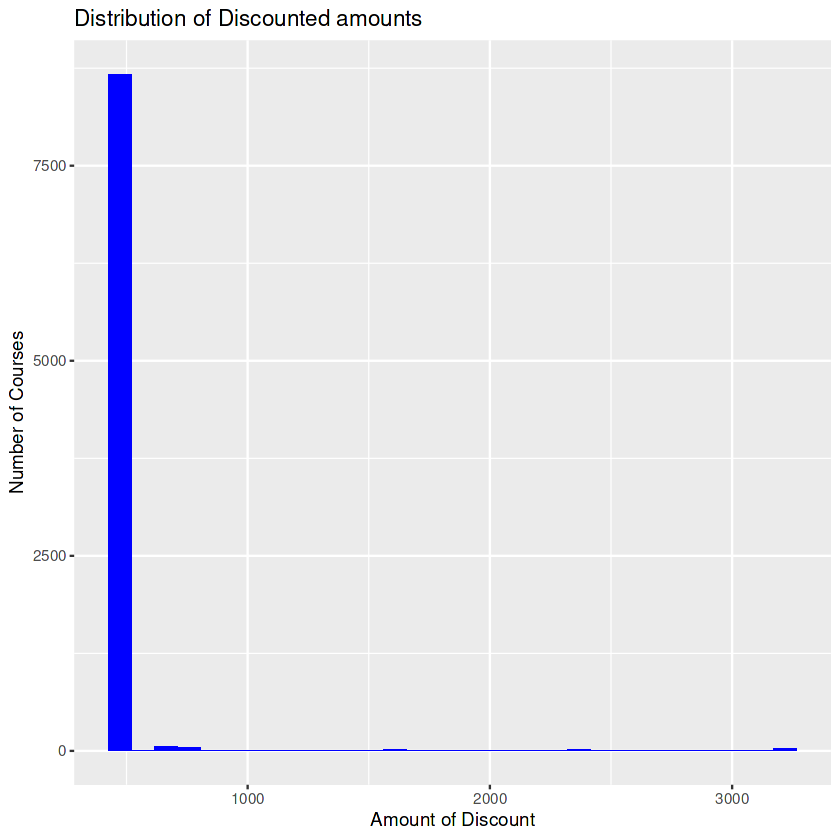

In [117]:
# Creating a Histogram
ggplot(data= discounted_courses, mapping= aes(x= discount_price__amount)) + geom_histogram(fill="blue") +
    labs(title= "Distribution of Discounted amounts", x="Amount of Discount", y= "Number of Courses")

-   This does not give a clearer picture of the discount distribution
    since the prices of the courses differ, so I will create a column to
    calculate the discount percentage

In [118]:
discounted_courses <- discounted_courses  %>% 
  mutate(discount_percentage= (discount_price__amount/ price_detail__amount)*100) 

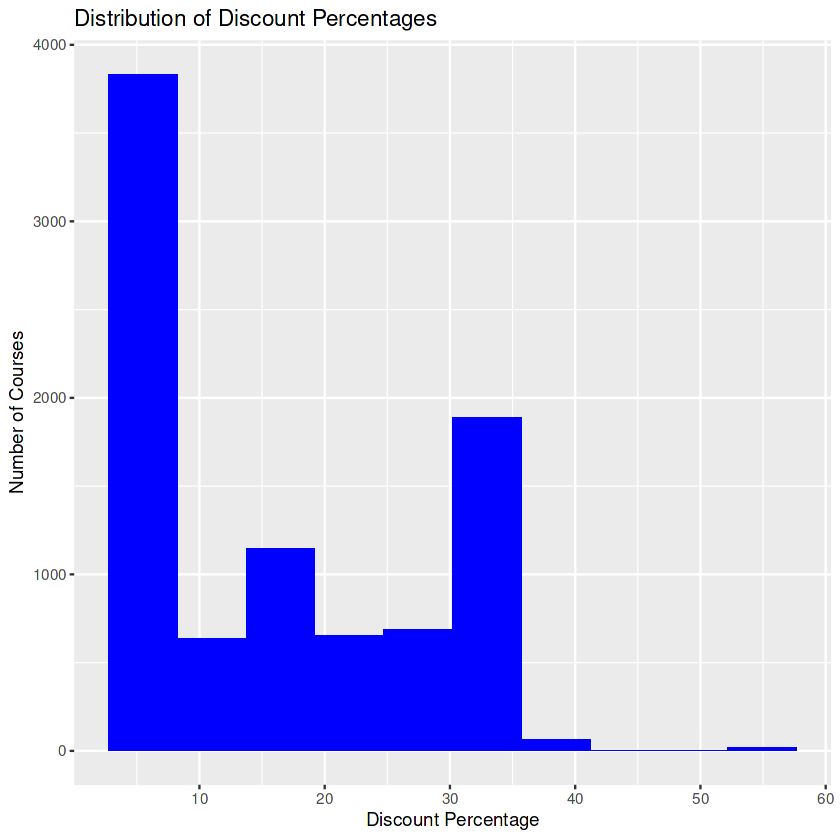

In [119]:
# Creating a Histogram
ggplot(data= discounted_courses, mapping= aes(x= discount_percentage)) + geom_histogram(bins= 10, fill="blue") +
    labs(title= "Distribution of Discount Percentages", x="Discount Percentage", y= "Number of Courses")

-   Majority of the discounts were between 4% and 35% with a few above
    40%

##### 4.2.6 Trend of number of created courses Since 2010

We will first create a column for the year of course upload separately


In [120]:
courses <- courses %>% mutate(year_published=year(published_time))

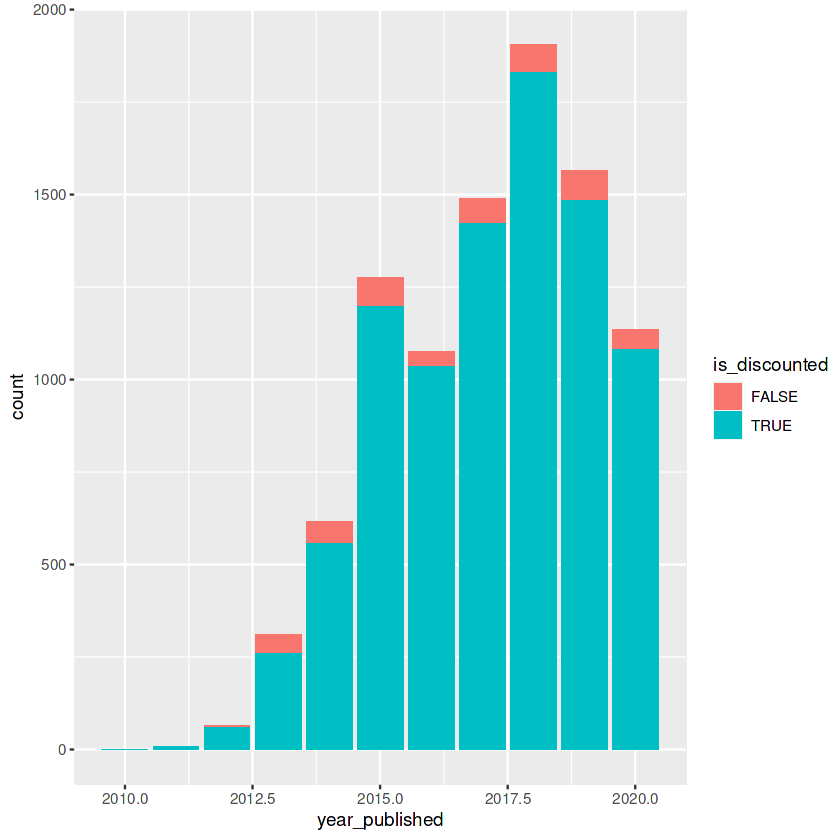

In [121]:
# Creating a Bar Chart for each year
ggplot(data= courses, mapping= aes(x= year_published, fill=is_discounted)) + geom_bar()



-   There was a rise in course publishing from 2010 to 2018, except for
    a flatuation in 2016. +More data is needed to prove that total
    number of courses created started to decline after 2018, since we do
    not have complete data for 2020 and 2018 could have been a very high
    spike.

#### 4.3 Correlation Analysis

Correlation Analysis check how various Variables relate to each other.
This analysis will be done by calculating `cor` and also drawing out a
scatter plot to indicate data relations while differentiating between
discounted courses and non-discounted courses

##### 4.3.1 Correlation between number of subscribers and number of reviews

**Does More Subscribers mean More reviews?**

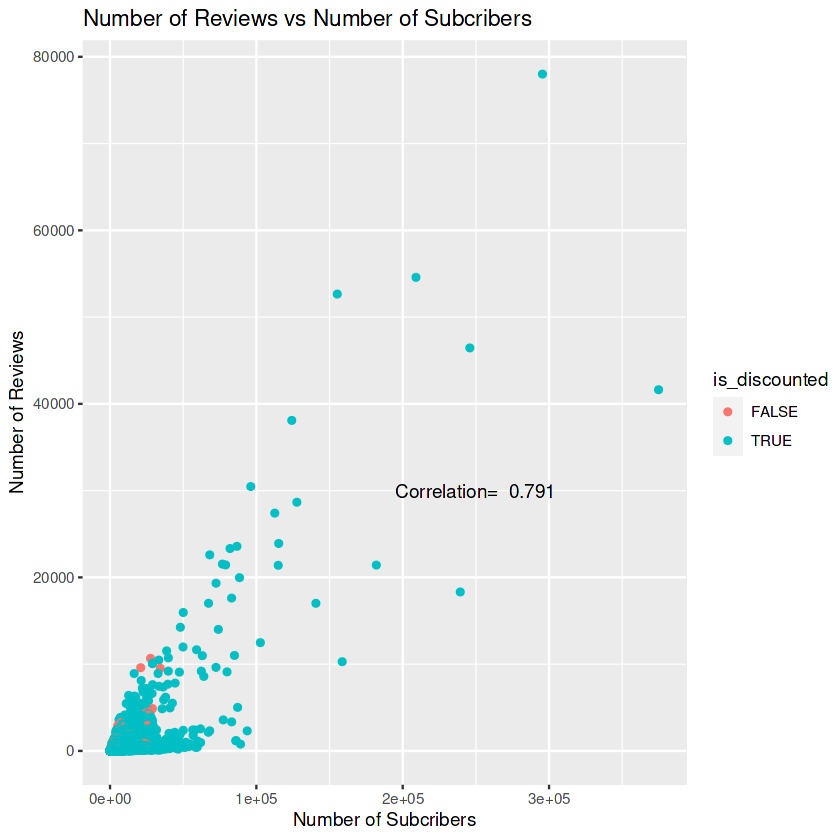

In [122]:
#calculating correlation
correlation <- courses %>% select(num_subscribers, num_reviews) %>% cor()
correlation<- round(correlation[1,2],3)

ggplot(data= courses, mapping= aes(x= num_subscribers, y= num_reviews, color= is_discounted)) + geom_point() + 
    labs(title= "Number of Reviews vs Number of Subcribers", x="Number of Subcribers", y= "Number of Reviews") + 
  annotate("text", x= 250000, y= 30000, label= paste("Correlation= ",correlation))

-   There is a strong relationship between number of subscribers and
    number of reviews.
-   **More Subscribers Corresponds to more Reviews**

##### 4.3.2 Correlation between number of published lectures and number of subscibers

**Does more lectures correspond to more Subscribers?**

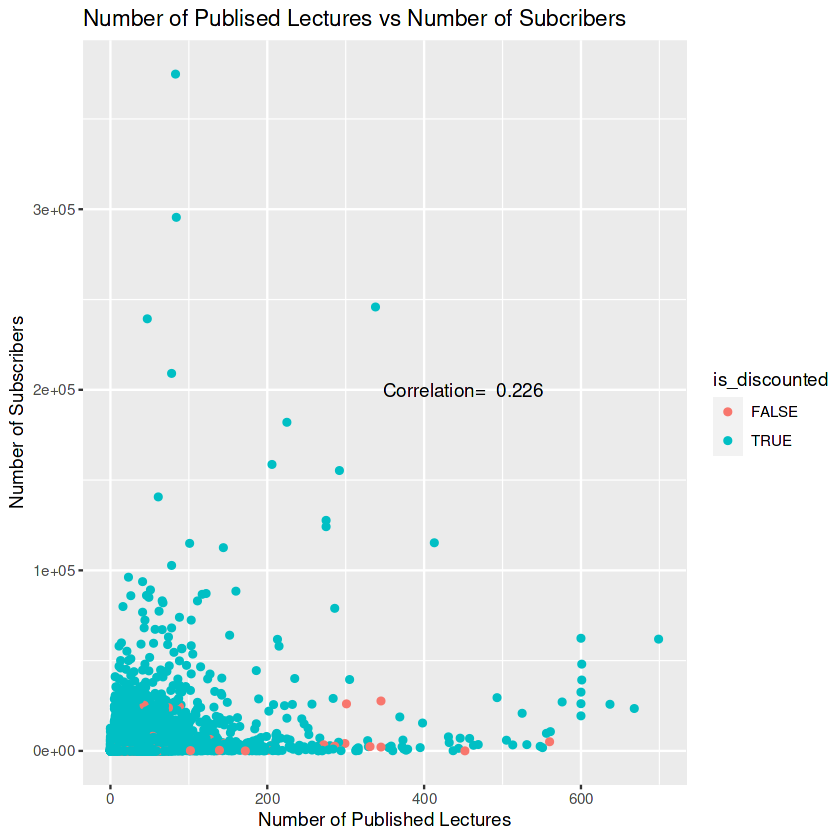

In [123]:
#calculating correlation
correlation <- courses %>% select(num_subscribers, num_published_lectures) %>% cor()
correlation<- round(correlation[1,2],3)

ggplot(data= courses, mapping= aes(x= num_published_lectures, y= num_subscribers, color= is_discounted)) + geom_point() + 
    labs(title= "Number of Publised Lectures vs Number of Subcribers", x="Number of Published Lectures", y= "Number of Subscribers") + 
  annotate("text", x= 450, y= 200000, label= paste("Correlation= ",correlation))


-   There is a weak relationship between number of published lectures
    and number of subscribers
-   **More Lectures does not mean more Subscribers**

##### 4.3.3 Correlation between Average Review and number of Subscribers

**Does Better Reviews Mean More Subscribers?**


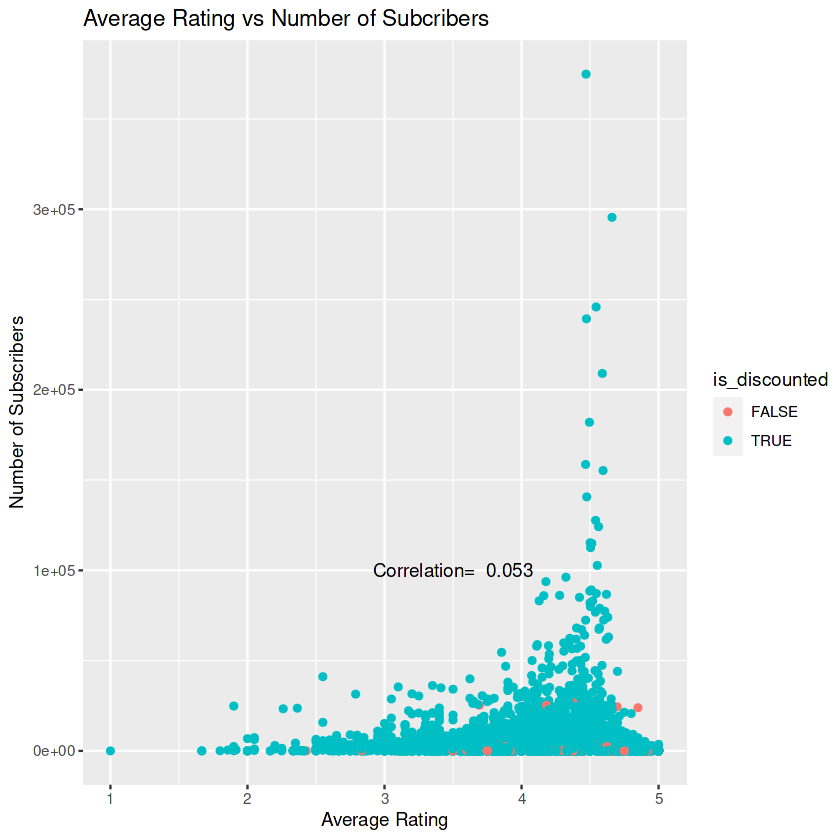

In [124]:
#calculating correlation
correlation <- courses %>% select(num_subscribers, avg_rating) %>% cor()
correlation<- round(correlation[1,2],3)

ggplot(data= courses, mapping= aes(x= avg_rating, y= num_subscribers, color= is_discounted)) + geom_point() + 
    labs(title= "Average Rating vs Number of Subcribers", x="Average Rating", y= "Number of Subscribers") +
  annotate("text", x= 3.5, y= 100000, label= paste("Correlation= ",correlation))


-   There is a very weak relationship between Average rating and Number
    of Subscribers
-   However, Poor reviews lead to very poor performance
-   **Better Review Does not Always mean More Subscribers **

##### 4.3.2 Correlation between course price and number of Subscribers


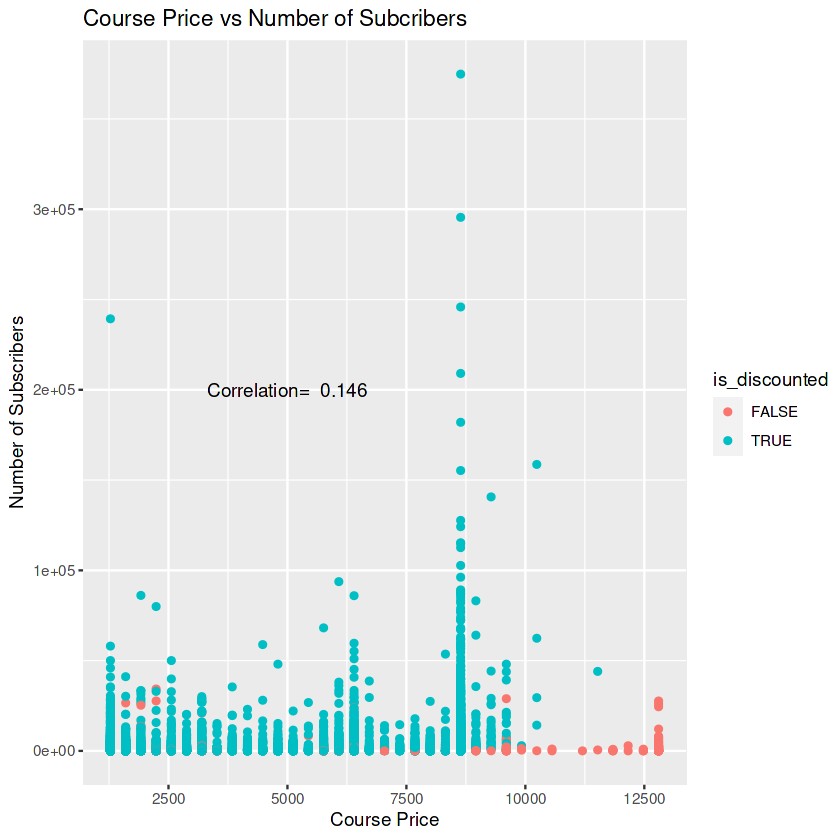

In [125]:
#calculating correlation
correlation <- courses %>% select(num_subscribers, price_detail__amount) %>% cor()
correlation<- round(correlation[1,2],3)

ggplot(data= courses, mapping= aes(x= price_detail__amount, y= num_subscribers, color= is_discounted)) + geom_point() +
    labs(title= "Course Price vs Number of Subcribers", x="Course Price", y= "Number of Subscribers") + 
  annotate("text", x= 5000, y= 200000, label= paste("Correlation= ",correlation))


-   There is a weak relationship between Course Price and number of
    Subscribers
-   **Price Matter a little, when it comes to getting more subscribers**

##### 4.3.5 Correlation between period of publication and number of Subscribers

In [126]:
# We will create a column to calculate the number of days since course was published with today as reference
courses <- courses %>% mutate(days_since_published = as.numeric(now() - published_time))

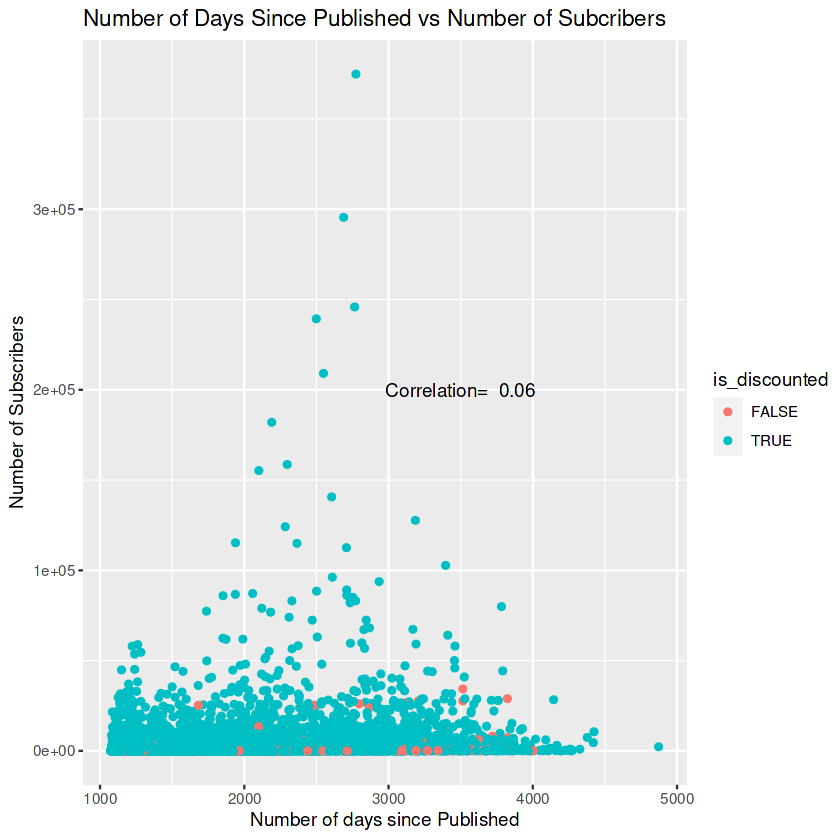

In [127]:
#calculating correlation
correlation <- courses %>% select(num_subscribers,days_since_published) %>% cor()
correlation<- round(correlation[1,2],3)

ggplot(data= courses) +
    geom_point( mapping= aes(x= days_since_published, y= num_subscribers, color= is_discounted)) + 
    labs(title= "Number of Days Since Published vs Number of Subcribers", x="Number of days since Published", y= "Number of Subscribers") +
    annotate("text", x= 3500, y= 200000, label= paste("Correlation= ",correlation))


-   Number of days of course been on the Udemy Platform has a weak
    relationship with number of subscribers
-   **The Longer the course on the platform does not translate to more
    subscribers**

##### 4.3.6 Correlation between discount and number of Subscribers


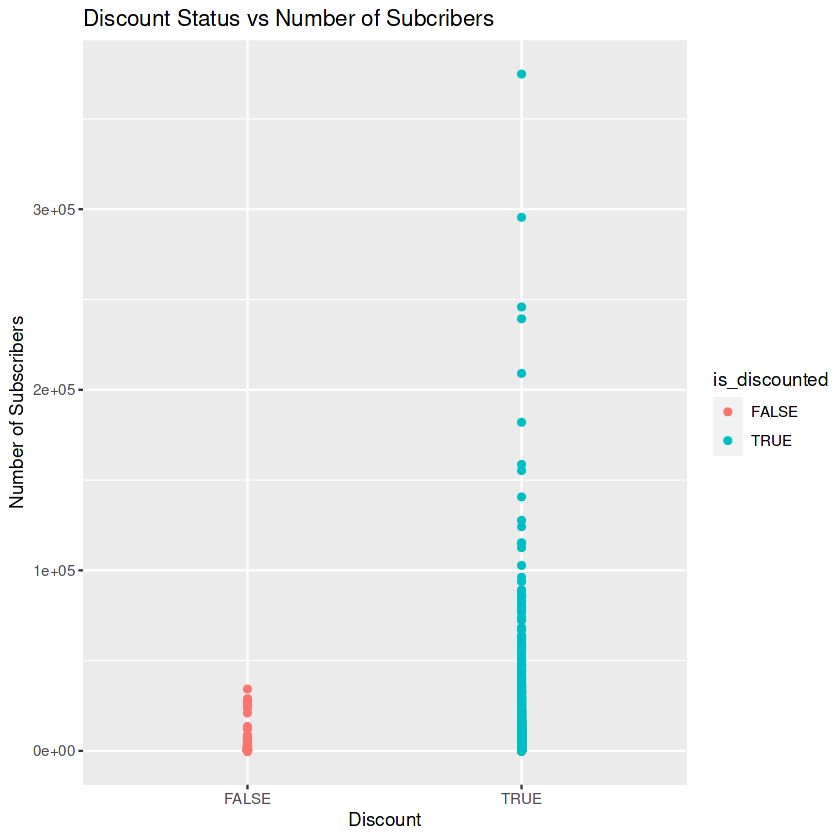

In [128]:
#calculating correlation
#correlation <- courses %>% select(num_subscribers, is_discounted) %>% cor()
#correlation<- round(correlation[1,2],3)

ggplot(data= courses, mapping= aes(x= is_discounted, y= num_subscribers, color= is_discounted)) + geom_point() + 
    labs(title= "Discount Status vs Number of Subcribers", x="Discount", y= "Number of Subscribers") 


-   Courses with Discount tend to perform better than those without
    discount. **Discount is important in getting more Subscribers**

##### 4.3.7 Correlation between Discount percentage and number of Subscribers
I will first assign 0 to courses without discount


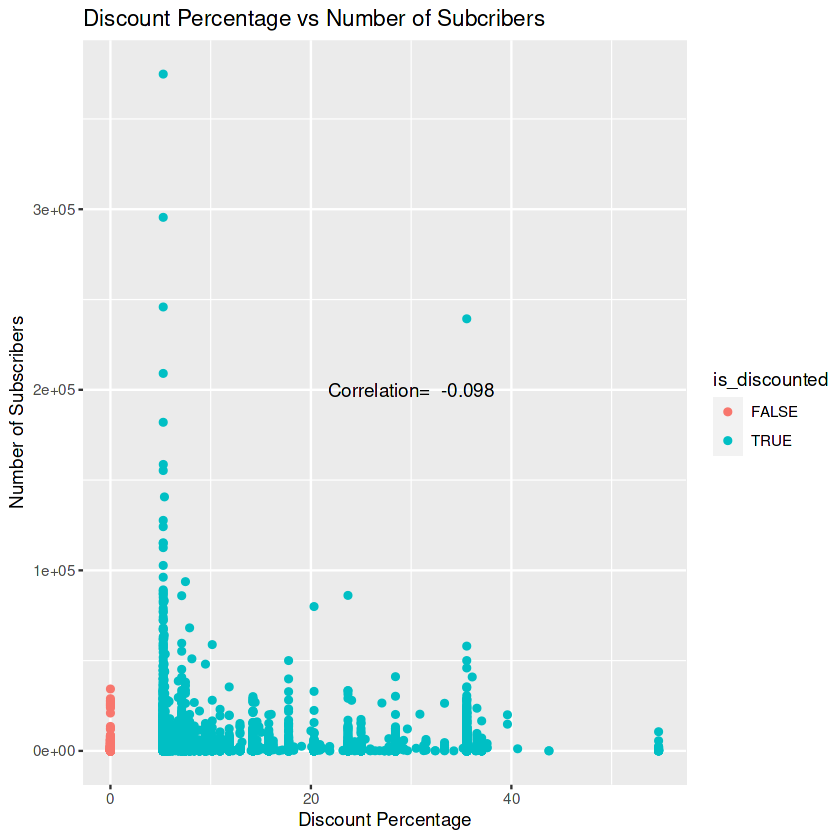

In [129]:
courses <- courses %>% mutate(course_discount = ifelse(is_discounted==FALSE, 0, discount_price__amount))

# Creating a Discount percentage column
courses <- courses %>% mutate(discount_percentage = (course_discount/ price_detail__amount)*100)

#calculating correlation
correlation <- courses %>% select(num_subscribers, discount_percentage) %>% cor()
correlation<- round(correlation[1,2],3)

ggplot(data= courses, mapping= aes(x= discount_percentage, y= num_subscribers, color= is_discounted)) + geom_point() + 
    labs(title= "Discount Percentage vs Number of Subcribers", x="Discount Percentage", y= "Number of Subscribers") +
  annotate("text", x= 30, y= 200000, label= paste("Correlation= ",correlation))

-   There is weak negative relationship between discount percentage and
    number of subscribers
-   **More Discount does mean more Subscriber, it can mean less**

### 5. Share Phase

A PowerPoint Presentation will be created with the key findings from
this data. But below are the key findings of the Analysis.


#### 5.1 Findings

-   Some courses perform extremely better than the rest, making the data
    skew to the left with a very long tail on the right.
-   High Number of Subscribers corresponds to high number of reviews and
    the vice versa. More reviews can lead to more Subscribers.
-   Number of lectures, Average Rating, Course Price, Number of Days
    since course was created, and Discount percentage has little effect
    on the number of subscribers.
-   Poor reviews leads to very poor performance.
-   However Discounted courses tend to perform better than
    Non-Discounted Courses.


#### 5.2 Limitations

These were the limitations encounted in the analysis.

-   I have yet to learn `Text Analysis`, which will help me to analyse
    how course titles and certain keywords influence Course performance.
-   The data did not include the specific category of course to allow
    for `Segment Analysis`.
-   The Outliers in the dataset were many and may have greatly
    influenced the outcome.
-   Description of Thumbnails were not included for the analysis.


#### 5.3 Conclusion

-   Having a discount on course and more Reviews can positively improve
    the performance of a course on UDEMY.
-   Other parameters like course price, average rating, how long the
    course stays on the platform and number of lectures on a course has
    little effect on it’s performance.

### 6. Act Phase

After the insights comes the action. Knowledge without action is
useless. From the Analysis, I suggest these actions to each stakeholder

#### 6.1 Recommendations to Course Creating Manager

-   Create courses that are more engaging than courses that are too
    long.
-   Continually remind Subscribers to write reviews on the course, as
    this will greatly influence the performance of the course.


#### 6.2 Reccomendations to Marketing Director

-   Incorporate Discounts more often into courses, as this can help the
    course to attract more subscribers.
-   Very High course discount may reduce the credibility of the course
    and reduce the number of subscribers
-   Cathy Titles and thumbnails should be used, but it is important to
    note that we are yet to gather more data to analyse how each affect
    course performance.


#### 6.3 Reccomendation to Chief Data Analyst

-   `Text Analysis` should be carried out on the course titles to know
    which keywords influence course performance.
-   More Data should encompassing
    `Thumbnail, Course Category, and other performance influencing variables`
    should be gathered for further analysis.


#### 6.3 Reccomendations for Further analysis

-   Do `Text Analysis`
-   Outliers should be removed analysed separately from the rest for
    better results.
-   A more detailed dataset should be used.